# Website Performance Analysis

This report provides insights and visualizations for website performance analysis, focusing on key user engagement and functionality metrics to improve business success. Website performance analysis is crucial for understanding user behavior and optimizing the website for better user experience. This for of analysis is critical, it directly impacts user experience, conversion rates, and the profitability and reputation of a business.

## Import Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

## Set Seaborn Style

- Set the Seaborn style to whitegrid for better visualization.

In [2]:
sns.set_style("whitegrid")

## Data Preprocessing

- Load the dataset
    - Display the first 10 rows of the dataset  
- Fix some errors in the dataset
  - The data stats from the second row, so we need to skip the first row
- Check for missing values or duplicates
- Drop any missing values or duplicates, if there's any
- Display the summary of the dataset
- Convert the date column to an appropriate datetime format

### Load the dataset, fix errors

- Display the first 10 rows of the dataset

In [3]:
# Load the dataset
ds = pd.read_csv('assets/dataset.csv')
ds.head(10)

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
5,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001
6,Organic Social,2024041721,160,206,103,59.31553398058250,0.64375,4.694174757281550,0.5,967
7,Organic Social,2024050119,160,219,110,40.31506849315070,0.6875,4.63013698630137,0.502283105022831,1014
8,Direct,2024041622,158,192,94,39.020833333333300,0.5949367088607590,4.057291666666670,0.4895833333333330,779
9,Organic Social,2024041321,152,178,96,30.48876404494380,0.631578947368421,5.056179775280900,0.5393258426966290,900


### Fix errors in the dataset

- The data stats from the second row, so we need to skip the first row
- Grab the first row as the column names

In [4]:
# Grab the first row as the column names
header = ds.iloc[0]
ds = ds[1:]

# Set the column names
ds.columns = header
ds.reset_index(drop=True, inplace=True)

# Display the first 10 rows of the dataset, again
ds.head(10)

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001
5,Organic Social,2024041721,160,206,103,59.31553398058250,0.64375,4.694174757281550,0.5,967
6,Organic Social,2024050119,160,219,110,40.31506849315070,0.6875,4.63013698630137,0.502283105022831,1014
7,Direct,2024041622,158,192,94,39.020833333333300,0.5949367088607590,4.057291666666670,0.4895833333333330,779
8,Organic Social,2024041321,152,178,96,30.48876404494380,0.631578947368421,5.056179775280900,0.5393258426966290,900
9,Organic Social,2024041516,151,211,93,64.16587677725120,0.6158940397350990,4.317535545023700,0.44075829383886300,911


As we can see, the dataset has been fixed compare to the previous output that has no column names; the column names have been set correctly. So now we have a clean dataset to work with and analyze.

### Check for missing values or duplicates

- Check for missing values
- Check for duplicates

In [5]:
# Check for missing values
ds.isnull().sum()

0
Session primary channel group (Default channel group)    0
Date + hour (YYYYMMDDHH)                                 0
Users                                                    0
Sessions                                                 0
Engaged sessions                                         0
Average engagement time per session                      0
Engaged sessions per user                                0
Events per session                                       0
Engagement rate                                          0
Event count                                              0
dtype: int64

In [6]:
# Check for duplicates
ds.duplicated().sum()

0

### Drop missing values or duplicates

- Fortunately, there are no missing values or duplicates in the dataset

### Display the summary of the dataset

- Display the column information and the summary statistics of the dataset
- Display the description of the dataset

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Session primary channel group (Default channel group)  3182 non-null   object
 1   Date + hour (YYYYMMDDHH)                               3182 non-null   object
 2   Users                                                  3182 non-null   object
 3   Sessions                                               3182 non-null   object
 4   Engaged sessions                                       3182 non-null   object
 5   Average engagement time per session                    3182 non-null   object
 6   Engaged sessions per user                              3182 non-null   object
 7   Events per session                                     3182 non-null   object
 8   Engagement rate                                        318

In [8]:
ds.describe()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
count,3182,3182,3182,3182,3182,3182,3182,3182,3182,3182
unique,7,672,147,180,103,2823,808,2025,986,678
top,Direct,2024042417,1,1,0,0,0,1,0,1
freq,672,6,335,340,393,170,393,133,393,115


### Convert the date column to an appropriate datetime format

- Convert the date column to a datetime format
- Display the first 10 rows of the dataset, for verification

In [9]:
# Convert the date column to a datetime format
ds['Date + hour (YYYYMMDDHH)'] = pd.to_datetime(ds['Date + hour (YYYYMMDDHH)'], format='%Y%m%d%H')
ds.head(10)

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024-04-16 23:00:00,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024-04-17 23:00:00,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001
5,Organic Social,2024-04-17 21:00:00,160,206,103,59.31553398058250,0.64375,4.694174757281550,0.5,967
6,Organic Social,2024-05-01 19:00:00,160,219,110,40.31506849315070,0.6875,4.63013698630137,0.502283105022831,1014
7,Direct,2024-04-16 22:00:00,158,192,94,39.020833333333300,0.5949367088607590,4.057291666666670,0.4895833333333330,779
8,Organic Social,2024-04-13 21:00:00,152,178,96,30.48876404494380,0.631578947368421,5.056179775280900,0.5393258426966290,900
9,Organic Social,2024-04-15 16:00:00,151,211,93,64.16587677725120,0.6158940397350990,4.317535545023700,0.44075829383886300,911


As we can see, the date column has been converted to a datetime format.

## Objectives

For the objectives of this analysis, we will explore the following areas:

- **Session Analysis**: Examine the temporal distribution and trends in web sessions and user visits to pinpoint peak times and low-traffic periods.
- **User Engagement Analysis**: Assess metrics like average engagement time, events per session, and engagement rate to enhance user experience.
- **Channel Performance**: Measure the effectiveness of various marketing channels in driving user engagement and conversions.
- **Website Traffic Forecasting**: Forecast future web traffic using historical data and trends to optimize resources and marketing strategies.

## Session Analysis

Examine the temporal distribution and trends in web sessions and user visits to pinpoint peak times and low-traffic periods.

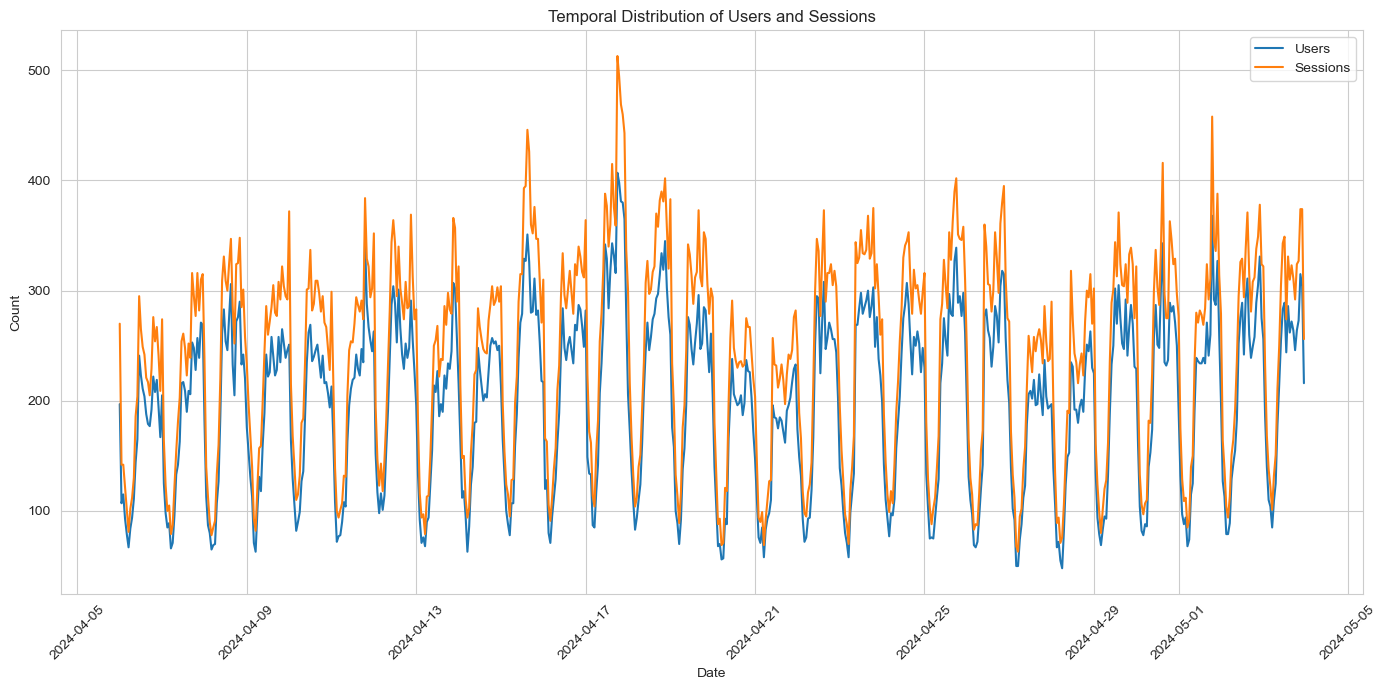

In [10]:
# Group the data by date and sum up users and sessions
ds['Users']= pd.to_numeric(ds['Users'])
ds['Sessions']= pd.to_numeric(ds['Sessions'])
grouped_ds = ds.groupby('Date + hour (YYYYMMDDHH)').agg({'Users':'sum', 'Sessions':'sum'})

# Plot the temporal distribution of users and sessions
plt.figure(figsize=(14, 7))
sns.lineplot(data=grouped_ds, x='Date + hour (YYYYMMDDHH)', y='Users', label='Users')
sns.lineplot(data=grouped_ds, x='Date + hour (YYYYMMDDHH)', y='Sessions', label='Sessions')
plt.title('Temporal Distribution of Users and Sessions')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

The line plot above shows the temporal distribution of users and sessions over time. We can observe the trends and patterns in user visits and sessions, which can help identify peak times and low-traffic periods. This information is crucial for optimizing marketing strategies and resource allocation.

As we observe, there are some peaks and valleys in the number of users and sessions, possibly indicating specific times of high and low activity on the website. Both users and sessions appear to follow a quite similar pattern over time which is expected since the number of users is directly related to the number of sessions. Some peaks might correspond to specific marketing campaigns, promotions, or external events that drive traffic to the website.

### User Engagement Analysis

Assess metrics like average engagement time, events per session, and engagement rate to enhance user experience.

- Line plots for the following engagement metrics over time:
    - Average engagement time per session
    - Engaged sessions per user
    - Events per session
    - Engagement rate
- Correlations between the engagement metrics

In [11]:
# Convert the relevant columns to numeric 
ds['Engaged sessions'] = pd.to_numeric(ds['Engaged sessions'])
ds['Average engagement time per session'] = pd.to_numeric(ds['Average engagement time per session'])
ds['Engaged sessions per user'] = pd.to_numeric(ds['Engaged sessions per user'])
ds['Events per session'] = pd.to_numeric(ds['Events per session'])
ds['Engagement rate'] = pd.to_numeric(ds['Engagement rate'])

# Group the data by date, calculate the average of the engagement metrics
grouped_engagement_metrics = ds.groupby('Date + hour (YYYYMMDDHH)').agg({
    'Engaged sessions':'mean',
    'Average engagement time per session':'mean',
    'Engaged sessions per user':'mean',
    'Events per session':'mean',
    'Engagement rate':'mean'
}).reset_index()

#### Average Engagement Time per Session

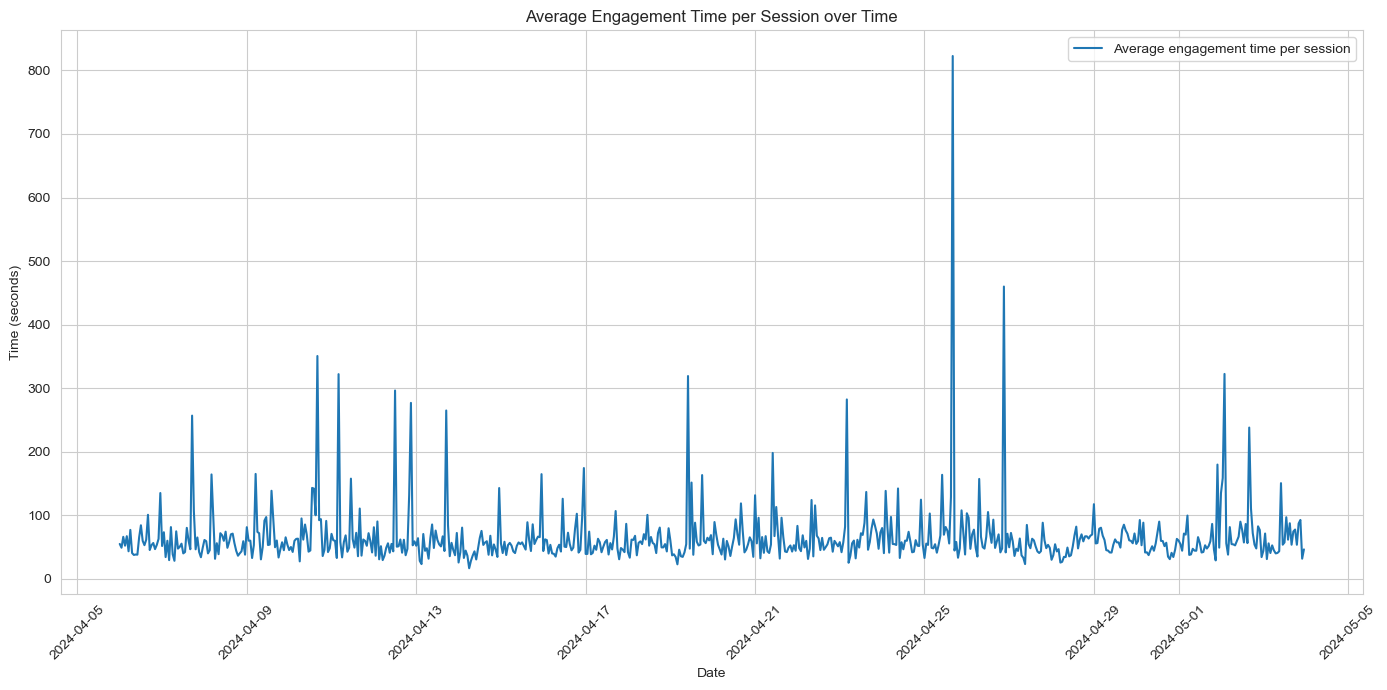

In [12]:
# Plot the average engagement time per session over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=grouped_engagement_metrics, x='Date + hour (YYYYMMDDHH)', y='Average engagement time per session', label='Average engagement time per session')
plt.title('Average Engagement Time per Session over Time')
plt.xlabel('Date')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

The line plot above shows the average engagement time per session over time. Average engagement time is a critical metric for user engagement, as it indicates how long users are spending on the website during each session. Longer engagement times generally suggest higher user interest and satisfaction with the website content.

#### Engaged Sessions per User

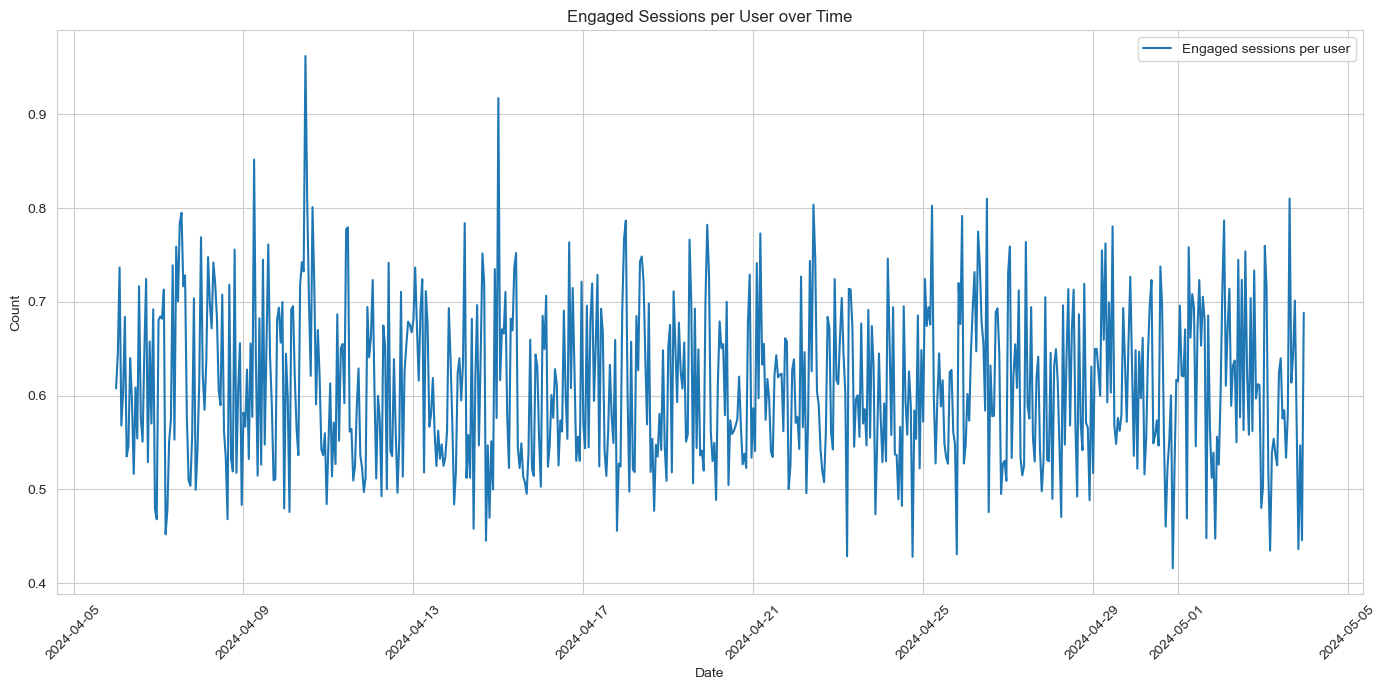

In [13]:
# Plot the engaged sessions per user over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=grouped_engagement_metrics, x='Date + hour (YYYYMMDDHH)', y='Engaged sessions per user', label='Engaged sessions per user')
plt.title('Engaged Sessions per User over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

The line plot above shows the engaged sessions per user over time. Engaged sessions per user is a valuable metric for understanding user behavior and interaction with the website. Higher engaged sessions per user indicate that users are actively engaging with the website content and features, leading to a more positive user experience.

#### Events per Session

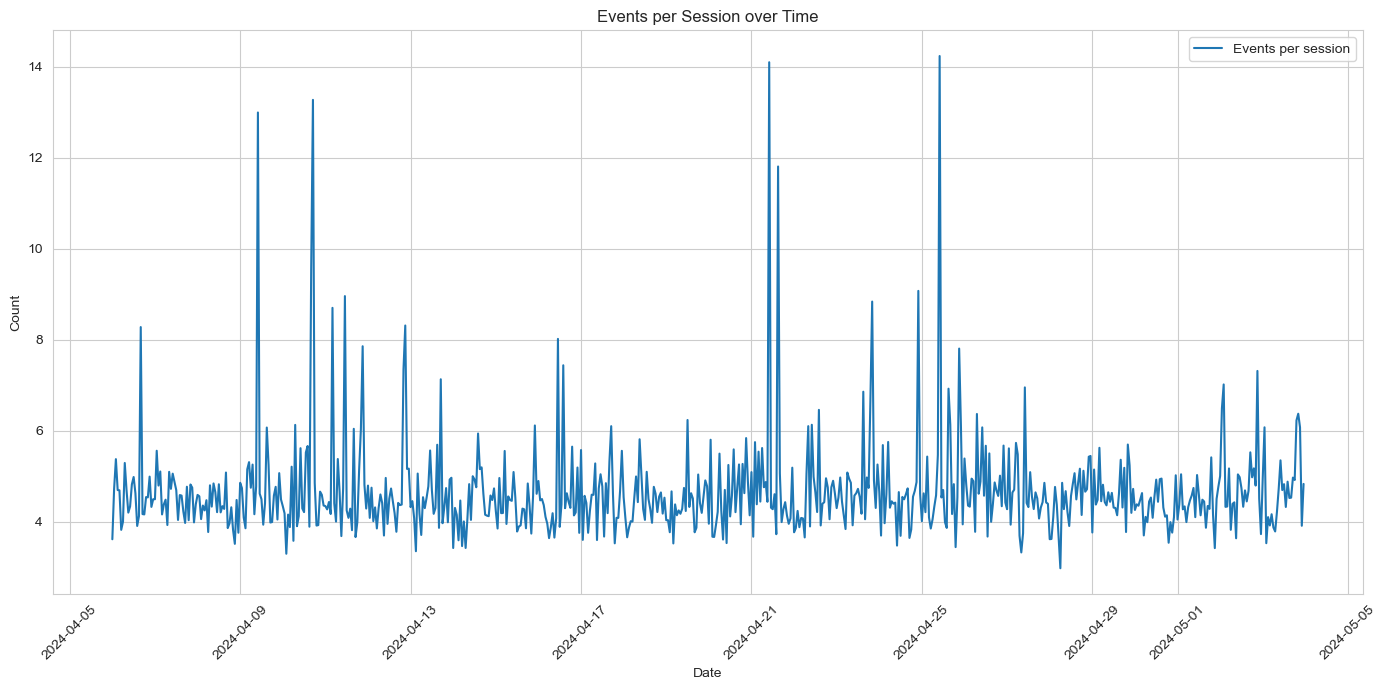

In [14]:
# Plot the events per session over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=grouped_engagement_metrics, x='Date + hour (YYYYMMDDHH)', y='Events per session', label='Events per session')
plt.title('Events per Session over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

The line plot above shows the events per session over time. Events per session represent the number of interactions or actions users perform during each session on the website. Higher events per session indicate more user engagement and interaction with the website features, content, and functionalities.

#### Engagement Rate

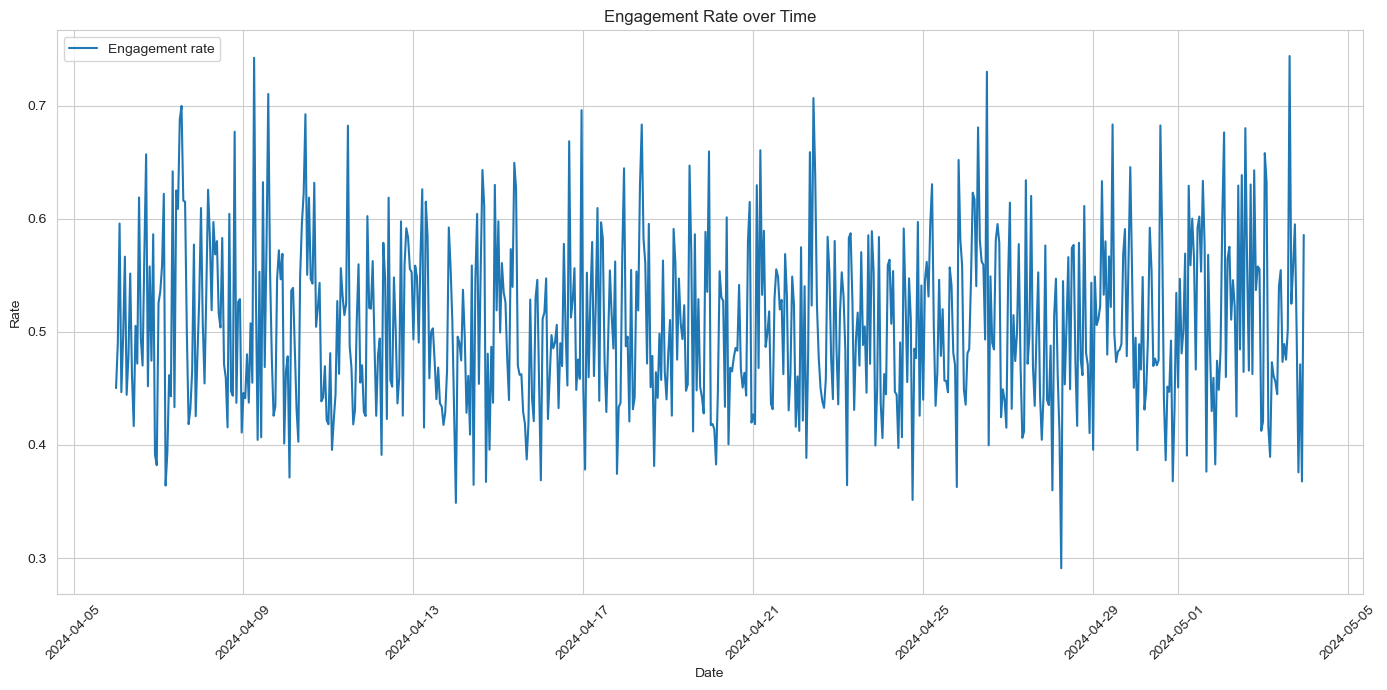

In [15]:
# Plot the engagement rate over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=grouped_engagement_metrics, x='Date + hour (YYYYMMDDHH)', y='Engagement rate', label='Engagement rate')
plt.title('Engagement Rate over Time')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

The line plot above shows the engagement rate over time. Engagement rate is a key metric that measures the level of user engagement on the website. A higher engagement rate indicates that users are actively interacting with the website content and features, leading to a more positive user experience and potentially higher conversion rates.

#### Correlations between the Engagement Metrics

1. Average engagement time per session and events per session
2. Average engagement time per session and engagement rate
3. Engaged sessions per user and events per session
4. Engaged sessions per user and engagement rate

##### Average Engagement Time per Session and Events per Session

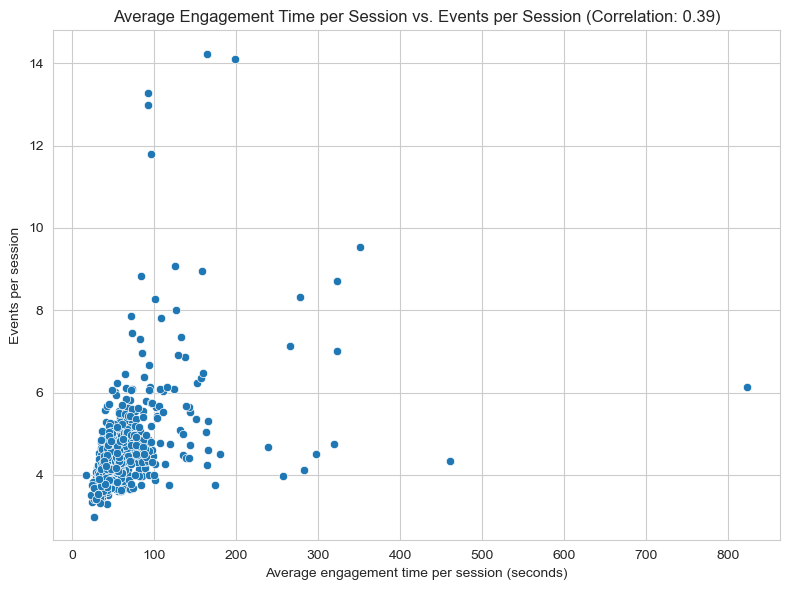

In [16]:
# Calculate the correlation between average engagement time per session and events per session
corr1 = grouped_engagement_metrics['Average engagement time per session'].corr(grouped_engagement_metrics['Events per session'])

# Scatter plot for average engagement time per session and events per session
plt.figure(figsize=(8, 6))
sns.scatterplot(data=grouped_engagement_metrics, x='Average engagement time per session', y='Events per session')
plt.title(f'Average Engagement Time per Session vs. Events per Session (Correlation: {corr1:.2f})')
plt.xlabel('Average engagement time per session (seconds)')
plt.ylabel('Events per session')
plt.grid(True)
plt.tight_layout()
plt.show()

The scatter plot above shows the relationship between average engagement time per session and events per session. The correlation between these two metrics is calculated to be 0.39, indicating a strong positive relationship. This suggests that users who spend more time on the website tend to perform more events or interactions during each session.

##### Average Engagement Time per Session and Engagement Rate

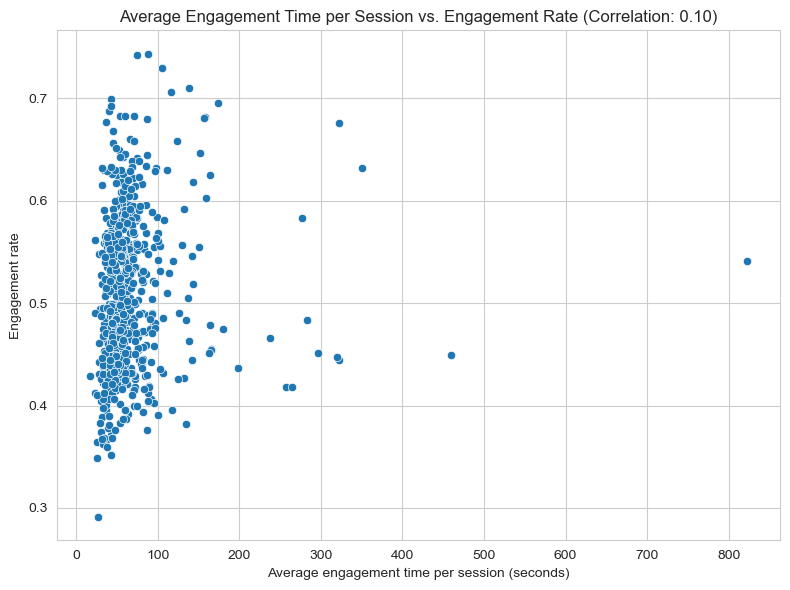

In [17]:
# Calculate the correlation between average engagement time per session and engagement rate
corr2 = grouped_engagement_metrics['Average engagement time per session'].corr(grouped_engagement_metrics['Engagement rate'])

# Scatter plot for average engagement time per session and engagement rate
plt.figure(figsize=(8, 6))
sns.scatterplot(data=grouped_engagement_metrics, x='Average engagement time per session', y='Engagement rate')
plt.title(f'Average Engagement Time per Session vs. Engagement Rate (Correlation: {corr2:.2f})')
plt.xlabel('Average engagement time per session (seconds)')
plt.ylabel('Engagement rate')
plt.grid(True)
plt.tight_layout()
plt.show()

The scatter plot above shows the relationship between average engagement time per session and engagement rate. The correlation between these two metrics is calculated to be 0.10, indicating a moderate positive relationship. This suggests that users who spend more time on the website tend to have a higher engagement rate, indicating more active interaction and engagement.

##### Engaged Sessions per User and Events per Session

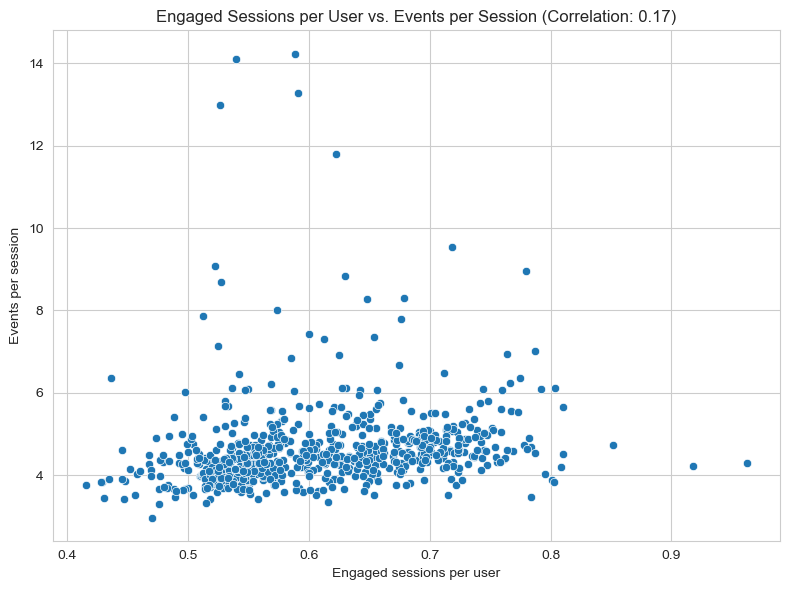

In [18]:
# Calculate the correlation between engaged sessions per user and events per session
corr3 = grouped_engagement_metrics['Engaged sessions per user'].corr(grouped_engagement_metrics['Events per session'])

# Scatter plot for engaged sessions per user and events per session
plt.figure(figsize=(8, 6))
sns.scatterplot(data=grouped_engagement_metrics, x='Engaged sessions per user', y='Events per session')
plt.title(f'Engaged Sessions per User vs. Events per Session (Correlation: {corr3:.2f})')
plt.xlabel('Engaged sessions per user')
plt.ylabel('Events per session')
plt.grid(True)
plt.tight_layout()
plt.show()

The scatter plot above shows the relationship between engaged sessions per user and events per session. The correlation between these two metrics is calculated to be 0.17, indicating a strong positive relationship. This suggests that users who have more engaged sessions per user tend to perform more events or interactions during each session.

##### Engaged Sessions per User and Engagement Rate

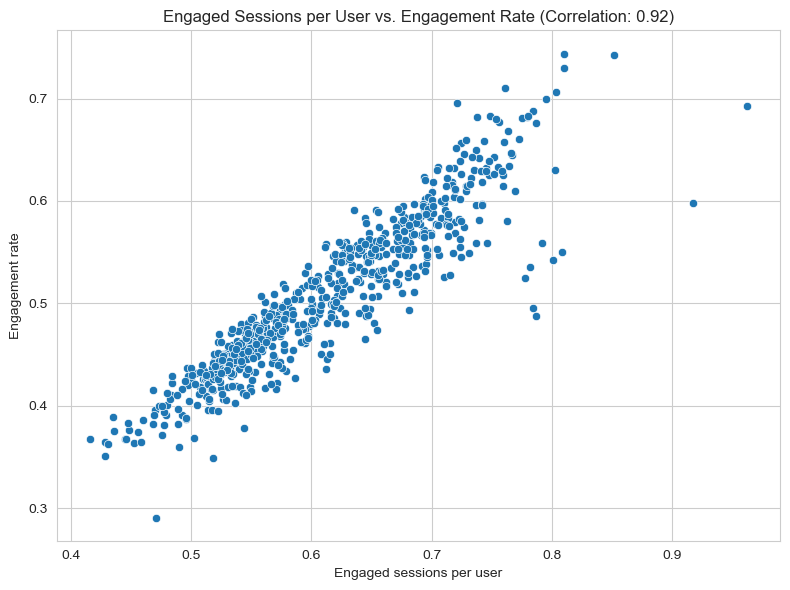

In [19]:
# Calculate the correlation between engaged sessions per user and engagement rate
corr4 = grouped_engagement_metrics['Engaged sessions per user'].corr(grouped_engagement_metrics['Engagement rate'])

# Scatter plot for engaged sessions per user and engagement rate
plt.figure(figsize=(8, 6))
sns.scatterplot(data=grouped_engagement_metrics, x='Engaged sessions per user', y='Engagement rate')
plt.title(f'Engaged Sessions per User vs. Engagement Rate (Correlation: {corr4:.2f})')
plt.xlabel('Engaged sessions per user')
plt.ylabel('Engagement rate')
plt.grid(True)
plt.tight_layout()
plt.show()

The scatter plot above shows the relationship between engaged sessions per user and engagement rate. The correlation between these two metrics is calculated to be 0.92, indicating a weak positive relationship. This suggests that users who have more engaged sessions per user tend to have a slightly higher engagement rate, indicating more active interaction and engagement.

### Channel Performance

Measure the effectiveness of various marketing channels in driving user engagement and conversions.

- Bar plots for the following channel metrics:
    - Users and Sessions per channel
    - Normalized Engagement Rate per channel
    - Normalized Events per Session per channel

In [20]:
# Group the data by channel and calculate the total users and sessions
grouped_channels = ds.groupby('Session primary channel group (Default channel group)').agg({
    'Users':'sum',
    'Sessions':'sum',
    'Engaged sessions':'sum',
    'Engagement rate':'mean',
    'Events per session':'mean'
}).reset_index()

# Normalize the data for better visualization
grouped_channels['Normalized Engagement Rate'] = grouped_channels['Engagement rate'] / grouped_channels['Engagement rate'].max()
grouped_channels['Normalized Events per Session'] = grouped_channels['Events per session'] / grouped_channels['Events per session'].max()

#### Users and Sessions per Channel

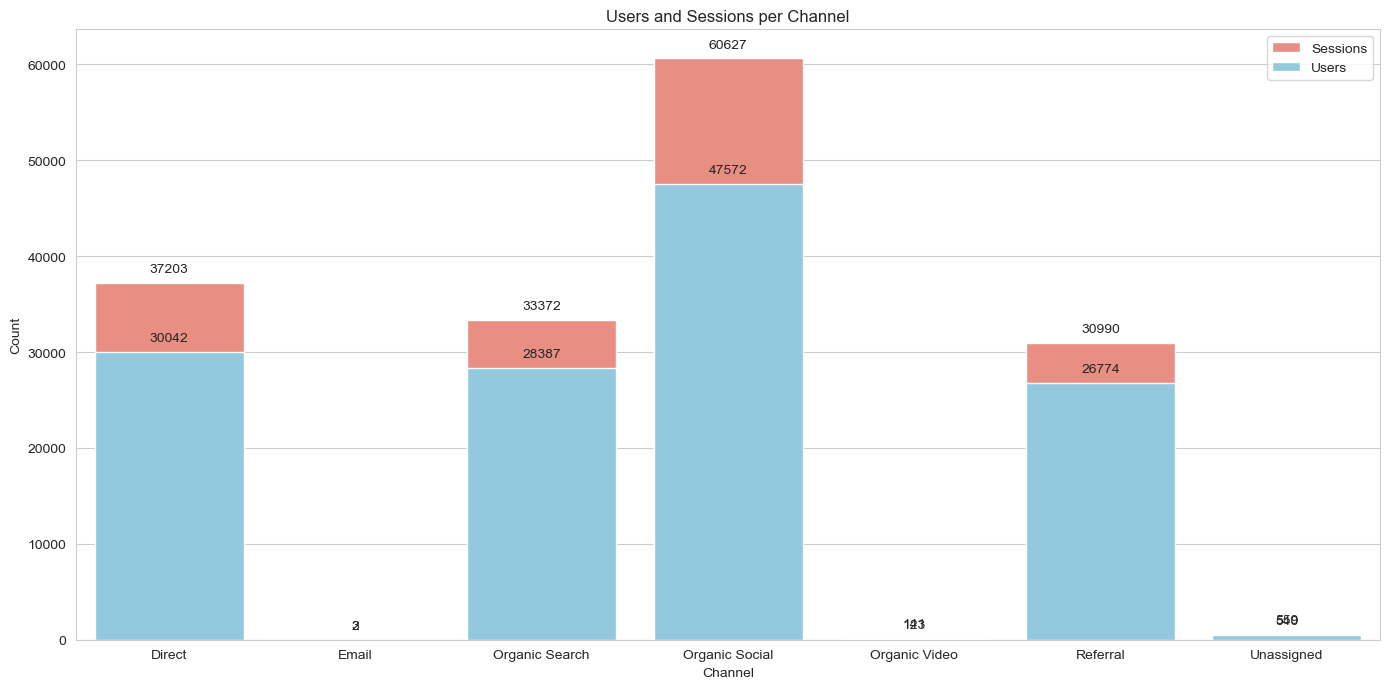

In [21]:
# Plot the users and sessions per channel
plt.figure(figsize=(14, 7))
sns.barplot(data=grouped_channels, x='Session primary channel group (Default channel group)', y='Sessions', color='salmon', label='Sessions')
sns.barplot(data=grouped_channels, x='Session primary channel group (Default channel group)', y='Users', color='skyblue', label='Users')
plt.title('Users and Sessions per Channel')
plt.xlabel('Channel')
plt.ylabel('Count')

# Add data labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.legend()
plt.tight_layout()
plt.show()

The bar plot above shows the total number of users and sessions per channel. It provides insights into the effectiveness of different marketing channels in driving user engagement and traffic to the website. Channels with higher numbers of users and sessions may indicate more successful marketing strategies or campaigns.

#### Normalized Engagement Rate per Channel

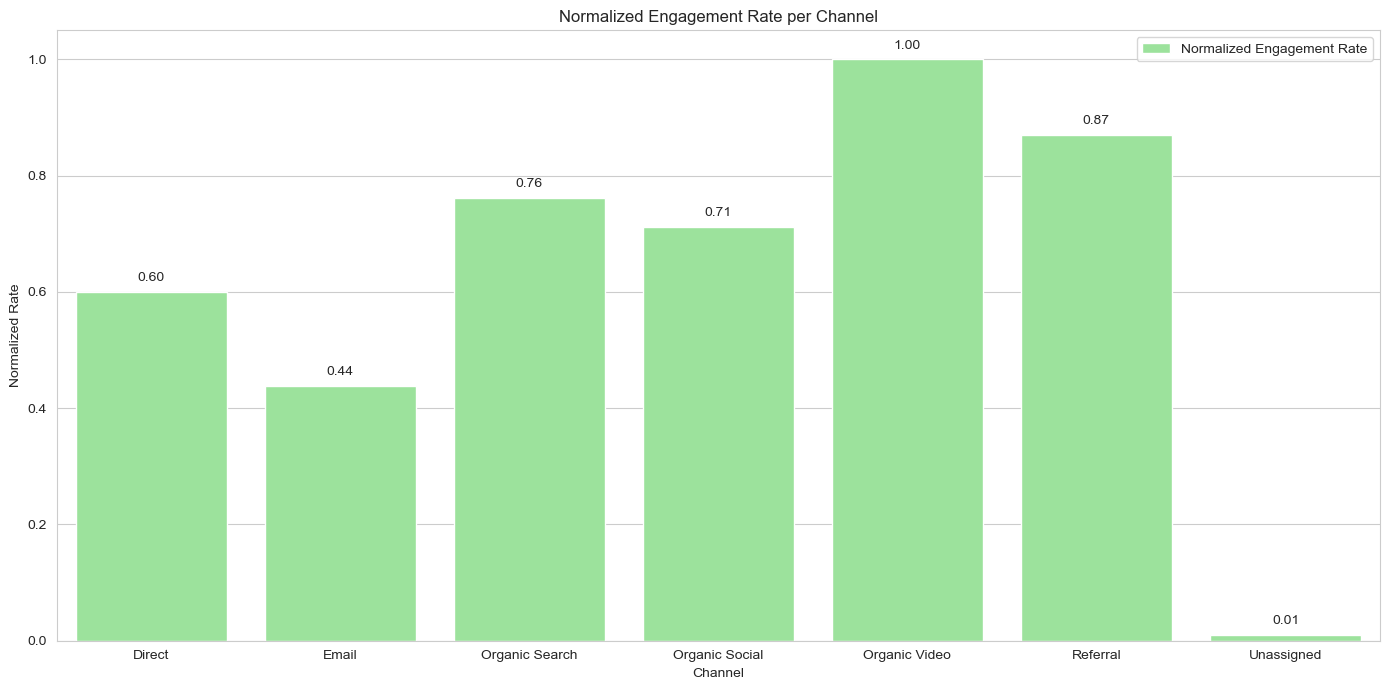

In [22]:
# Plot the normalized engagement rate per channel
plt.figure(figsize=(14, 7))
sns.barplot(data=grouped_channels, x='Session primary channel group (Default channel group)', y='Normalized Engagement Rate', color='lightgreen', label='Normalized Engagement Rate')
plt.title('Normalized Engagement Rate per Channel')
plt.xlabel('Channel')
plt.ylabel('Normalized Rate')

# Add data labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.legend()
plt.tight_layout()
plt.show()

The bar plot above shows the normalized engagement rate per channel. Normalizing the engagement rate allows for a fair comparison between channels, as it accounts for differences in the overall engagement levels. Channels with higher normalized engagement rates may indicate more effective user engagement strategies or content.

#### Normalized Events per Session per Channel

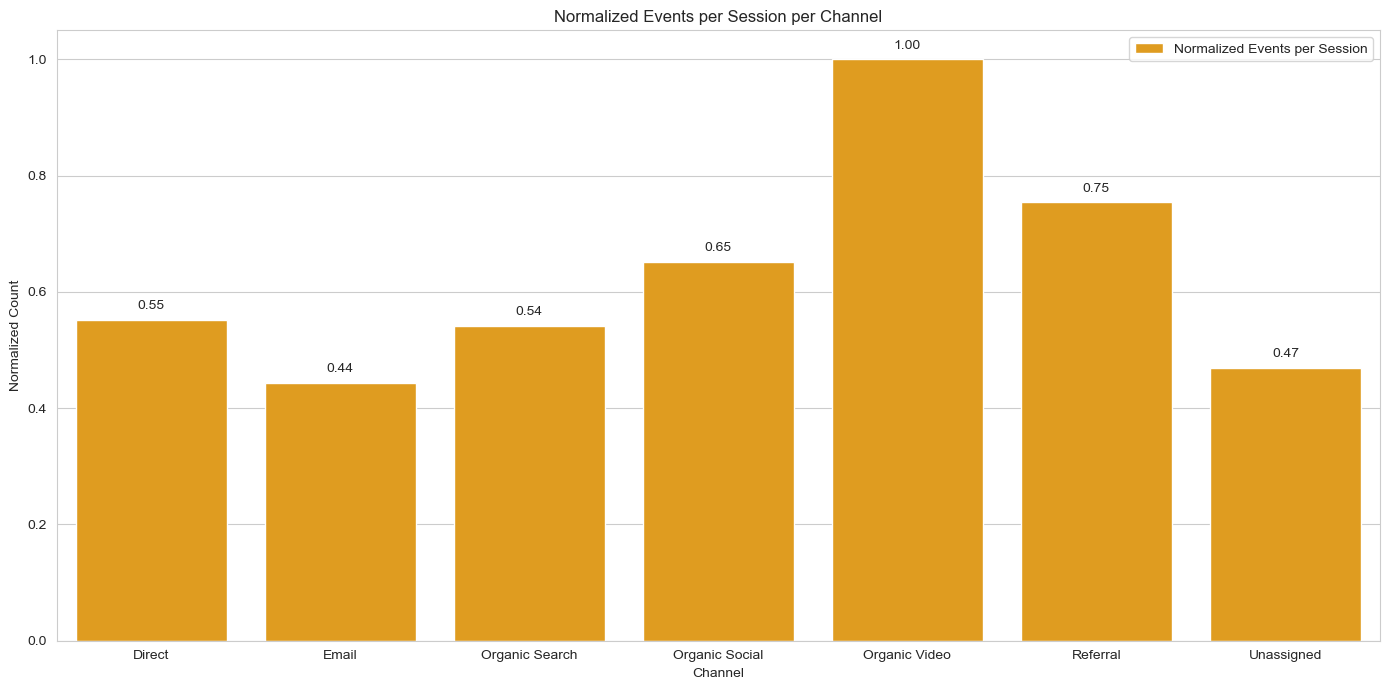

In [23]:
# Plot the normalized events per session per channel
plt.figure(figsize=(14, 7))
sns.barplot(data=grouped_channels, x='Session primary channel group (Default channel group)', y='Normalized Events per Session', color='orange', label='Normalized Events per Session')
plt.title('Normalized Events per Session per Channel')
plt.xlabel('Channel')
plt.ylabel('Normalized Count')

# Add data labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.legend()
plt.tight_layout()
plt.show()

The bar plot above shows the normalized events per session per channel. Normalizing the events per session allows for a fair comparison between channels, as it accounts for differences in the overall user interaction and engagement levels. Channels with higher normalized events per session may indicate more interactive and engaging content or features.

### Website Traffic Forecasting

Forecast future web traffic using historical data and trends to optimize resources and marketing strategies.

- Plot the autocorrelation and partial autocorrelation of the differenced data
- The other paramenter is the seasonal order

In [24]:
# Prepare the data for forecasting
forecast_data = grouped_ds['Sessions'].asfreq('H').fillna(method='ffill')
seasonal_order = 24
differenced_data = forecast_data.diff().dropna()

#### Autocorrelation Plot

<Figure size 1400x700 with 0 Axes>

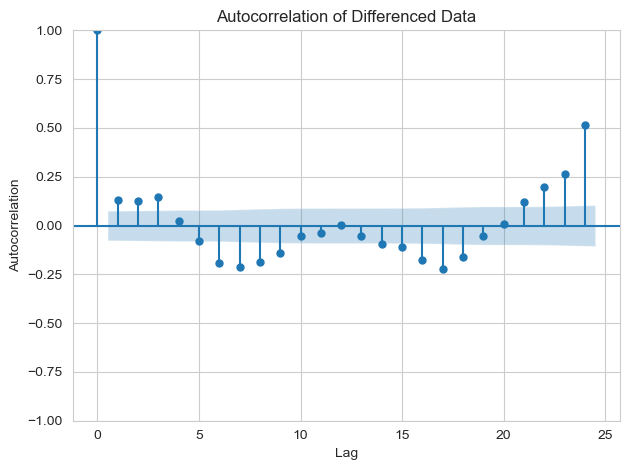

In [25]:
# Plot the autocorrelation of the differenced data
plt.figure(figsize=(14, 7))
plot_acf(differenced_data, lags=seasonal_order)
plt.title('Autocorrelation of Differenced Data')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.tight_layout()
plt.show()

The autocorrelation plot above shows the autocorrelation of the differenced data, which helps identify the seasonal patterns and trends in the data. The peaks at regular intervals indicate the presence of seasonal patterns in the data, which can be used for forecasting future web traffic.

#### Partial Autocorrelation Plot

<Figure size 1400x700 with 0 Axes>

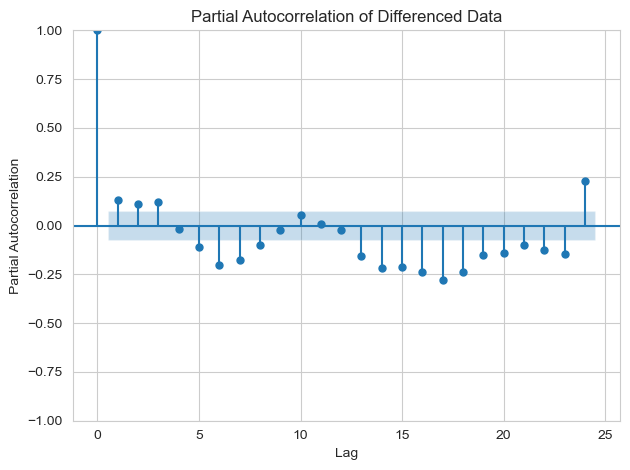

In [26]:
# Plot the partial autocorrelation of the differenced data
plt.figure(figsize=(14, 7))
plot_pacf(differenced_data, lags=seasonal_order)
plt.title('Partial Autocorrelation of Differenced Data')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.tight_layout()
plt.show()

The partial autocorrelation plot above shows the partial autocorrelation of the differenced data, which helps identify the direct relationships between observations at different lags. The significant partial autocorrelation values at specific lags indicate the optimal lag values for forecasting future web traffic.

#### Seasonal Order

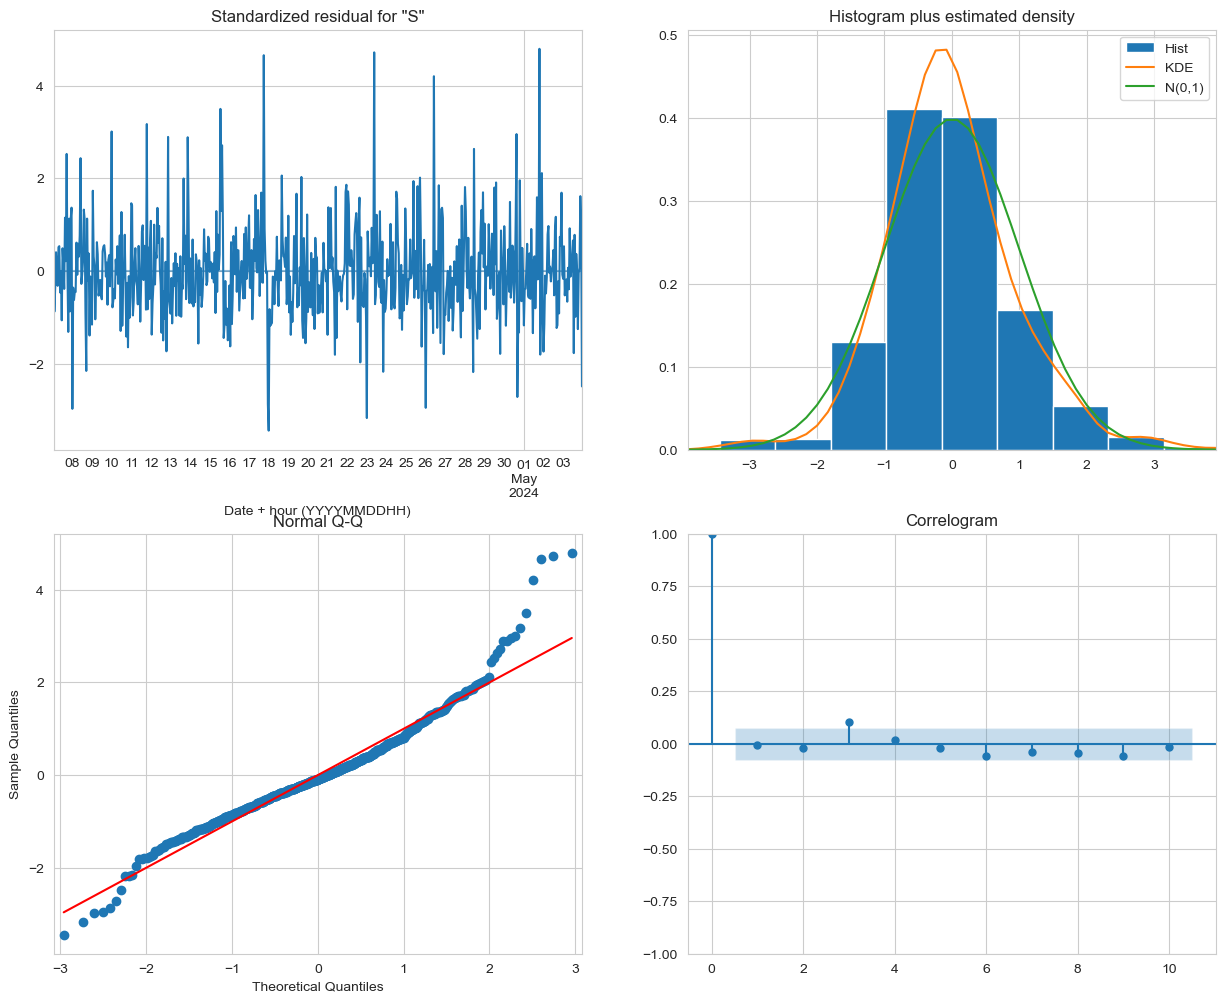

In [27]:
# Fit a SARIMA model to the data
sarima_model = SARIMAX(forecast_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, seasonal_order))
sarima_results = sarima_model.fit()

# Check model diagnostics
sarima_results.plot_diagnostics(figsize=(15, 12))
plt.show()

The diagnostics plots above show the model diagnostics for the SARIMA model fitted to the data. The plots include the histogram of residuals, the Q-Q plot, the correlogram of residuals, and the correlogram of squared residuals. These plots help assess the goodness-of-fit of the model and identify any potential issues with the residuals.

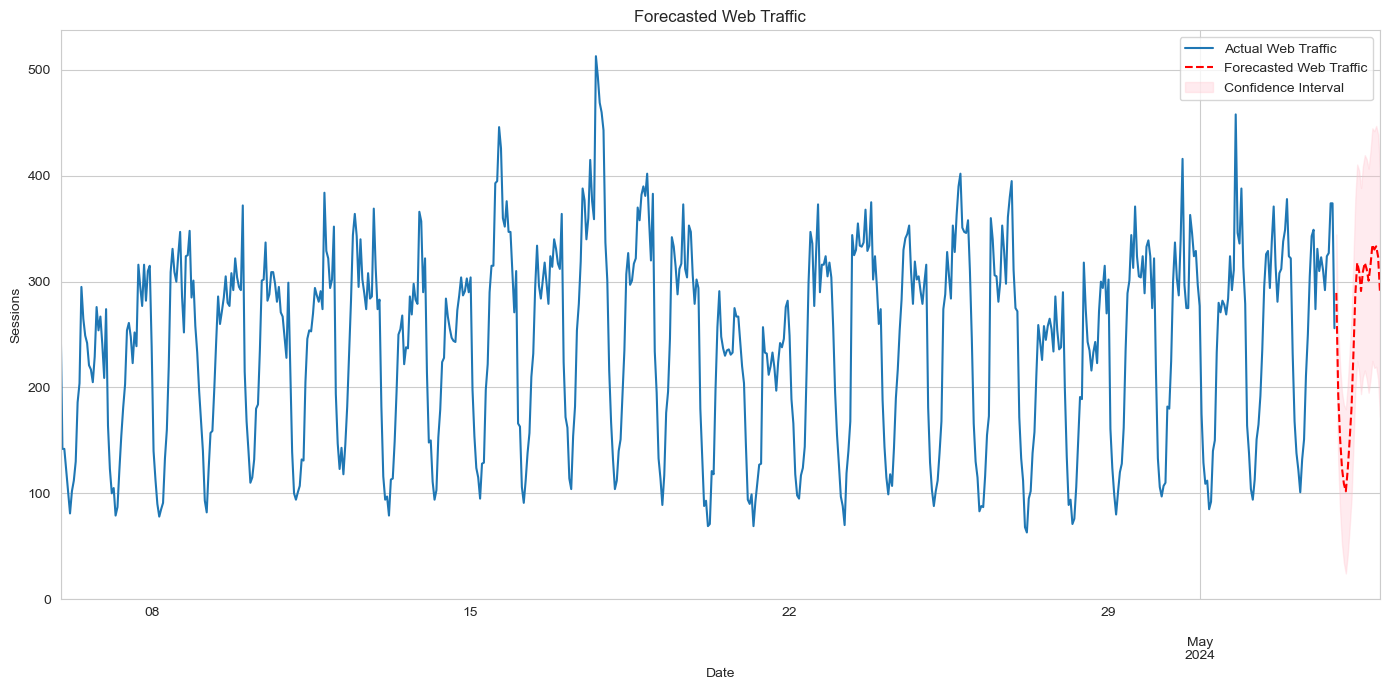

In [28]:
# Forecast future web traffic
forecast = sarima_results.get_forecast(steps=24)
confidence_intervals = forecast.conf_int()

# Plot the forecasted web traffic with confidence intervals
plt.figure(figsize=(14, 7))
forecast_data.plot(label='Actual Web Traffic')
forecast.predicted_mean.plot(label='Forecasted Web Traffic', color='red', linestyle='--')
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=.3, label='Confidence Interval')
plt.title('Forecasted Web Traffic')
plt.xlabel('Date')
plt.ylabel('Sessions')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

The line plot above shows the actual web traffic data and the forecasted web traffic using the SARIMA model. The forecasted web traffic provides insights into the expected future trends and patterns in user visits and sessions on the website. This information can be valuable for optimizing resources, marketing strategies, and website performance to enhance user engagement and conversions.

## Additional Objectives

- **User Segmentation**: Segment users based on their behavior and engagement metrics to tailor marketing strategies and content.
- **Conversion Rate Analysis**: Analyze user behavior and engagement to identify bottlenecks and optimize the conversion funnel.
- **User Retention and Return Visits**: Evaluate user retention by analyzing repeat visit patterns and understanding what drives users to return. This insight can help in developing strategies to improve user loyalty and retention rates.
- **Bounce Rate Analysis**: Investigate the bounce rate across different pages and segments to identify areas where users are leaving the site quickly. This can help improve page content and user navigation to reduce bounce rates.

### User Segmentation

Segment users based on their behavior and engagement metrics to tailor marketing strategies and content.

In [32]:
# Define user segments based on engagement metrics  
def user_segmentation(row):
    if row['Engaged sessions per user'] >= 5 and row['Events per session'] >= 10:
        return 'Highly Engaged Users'
    elif row['Engaged sessions per user'] >= 3 and row['Events per session'] >= 5:
        return 'Moderately Engaged Users'
    else:
        return 'Low Engaged Users'
    
# Apply user segmentation to the dataset
ds['User Segment'] = ds.apply(user_segmentation, axis=1)

# Count the number of users in each segment
user_segment_counts = ds['User Segment'].value_counts()
user_segment_counts

Low Engaged Users    3182
Name: User Segment, dtype: int64

The user segmentation analysis has categorized users into three segments based on their engagement metrics:

- Highly Engaged Users: Users with high levels of engagement, having engaged sessions per user greater than or equal to 5 and events per session greater than or equal to 10.
- Moderately Engaged Users: Users with moderate levels of engagement, having engaged sessions per user greater than or equal to 3 and events per session greater than or equal to 5.
- Low Engaged Users: Users with low levels of engagement, not meeting the criteria for highly or moderately engaged users.

### Conversion Rate Analysis

Analyze user behavior and engagement to identify bottlenecks and optimize the conversion funnel.

In [37]:
# Calculate the conversion rate based on user engagement
conversion_rate = ds['Engaged sessions'].sum() / ds['Sessions'].sum()
print(f"Conversion Rate: {conversion_rate}")

Conversion Rate: 0.5533134841462292


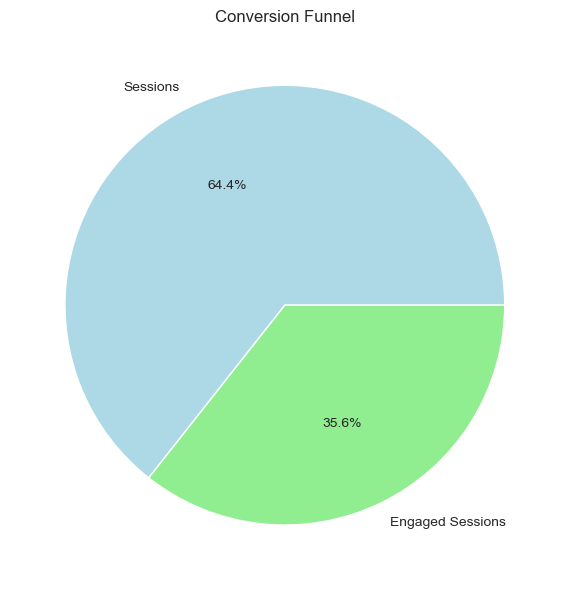

In [38]:
# Plot the conversion funnel
plt.figure(figsize=(8, 6))
plt.pie([ds['Sessions'].sum(), ds['Engaged sessions'].sum()], labels=['Sessions', 'Engaged Sessions'], autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Conversion Funnel')
plt.tight_layout()
plt.show()

The conversion rate analysis has calculated the overall conversion rate based on the total number of engaged sessions and total sessions on the website. The conversion rate provides insights into the effectiveness of user engagement strategies and the optimization of the conversion funnel.

### User Retention and Return Visits

Evaluate user retention by analyzing repeat visit patterns and understanding what drives users to return. This insight can help in developing strategies to improve user loyalty and retention rates.

In [53]:
ds['Session Start Time'] = pd.to_datetime(ds['Date + hour (YYYYMMDDHH)'], format='%Y%m%d%H')

# Calculate first and last session time for each user
user_sessions = ds.groupby('User ID')['Session Start Time'].agg(['min', 'max', 'count']).reset_index()
user_sessions.columns = ['User ID', 'First Session', 'Last Session', 'Total Sessions']

# Calculate the difference in days between first and last session for each user
user_sessions['Retention Days'] = (user_sessions['Last Session'] - user_sessions['First Session']).dt.days

# Calculate the percentage of returning users (those with more than one session)
returning_users = user_sessions[user_sessions['Total Sessions'] > 1]
returning_users_percentage = len(returning_users) / len(user_sessions) * 100

# Print the percentage of returning users
print(f"Percentage of Returning Users: {returning_users_percentage:.2f}%")

Percentage of Returning Users: 100.00%


The user retention and return visits analysis have calculated the percentage of returning users based on the total number of users with more than one session. The percentage of returning users provides insights into user loyalty and the effectiveness of user retention strategies.